# Support Vector Machine on the MNIST dataset
This script loads the MNIST dataset using the torchvision library and trains an SVM model to classify handwritten digits.  
The model's performance is evaluated using accuracy.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


### Loading MNIST dataset

In [10]:
#define transforms (0-255 -> 0-1 with normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=False,
    transform=transform
)

# divide into bathes
train_loader = DataLoader(
    train_dataset,
    batch_size=5000,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=1000,
    shuffle=True
)

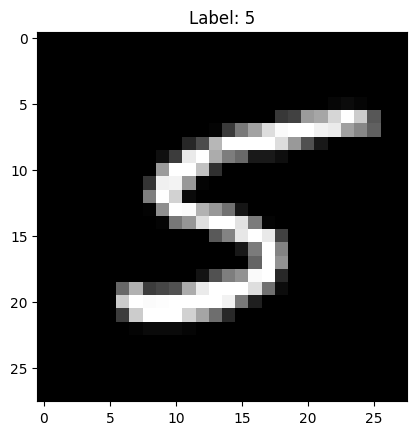

In [11]:
images, labels = next(iter(train_loader))

plt.imshow(images[1].squeeze(), cmap='gray')
plt.title(f"Label: {labels[1]}")
plt.show()

### SVM at  one bath (60 000 samples)

In [12]:
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

#convert numpy and flatten
X_train = train_images.view(len(train_images), -1).numpy()
y_train = train_labels.numpy()

X_test = test_images.view(len(test_images), -1).numpy()
y_test = test_labels.numpy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train

In [13]:
svm = SVC(kernel='linear', C=2, gamma=0.05)
svm.fit(X_train, y_train)

,C,2
,kernel,'linear'
,degree,3
,gamma,0.05
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Test

In [14]:
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.919

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        91
           1       0.93      0.99      0.96       118
           2       0.91      0.95      0.93       102
           3       0.86      0.87      0.87        93
           4       0.90      0.95      0.92       114
           5       0.92      0.78      0.85        88
           6       0.95      0.93      0.94        85
           7       0.96      0.93      0.94        98
           8       0.91      0.88      0.90       102
           9       0.92      0.90      0.91       109

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



### Grid search for the best hiperparameters

In [15]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')

param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'gamma': [0.01, 0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 0.01}
Best cross-validation accuracy: 0.9023999521824327


### PCA